In [7]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [8]:
# lendo os arquivos
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
dataset.shape

(999, 12)

In [10]:
# nomeando as colunas
dataset.columns = ["ID", "Score","Estado" ,"Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [11]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [12]:
#Explorando colunas categóricas
# exibe quantos registros, agrupado por estado, existem
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

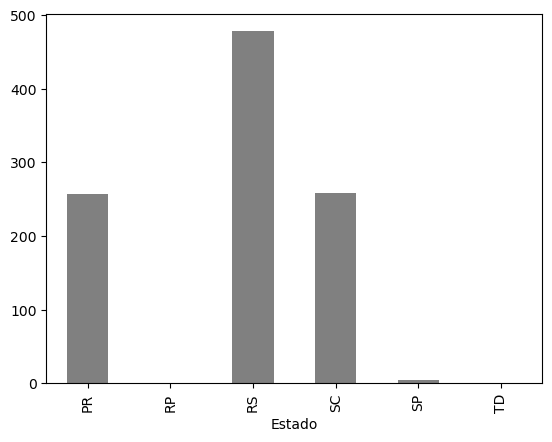

In [13]:
# visualizar de forma gráfica
agrupado.plot.bar(color = 'grey')

In [14]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

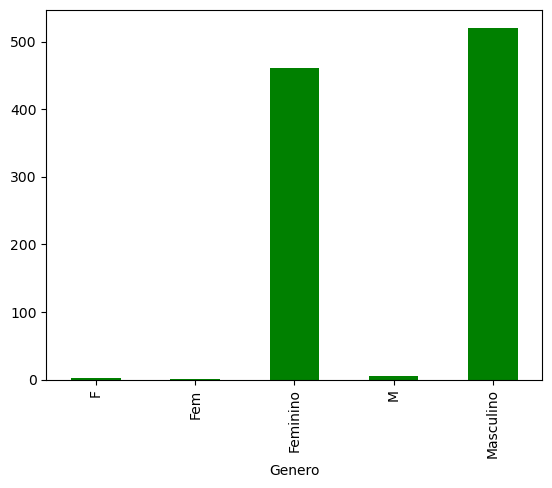

In [15]:
agrupado.plot.bar(color = 'green')

In [16]:
#Explorando colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

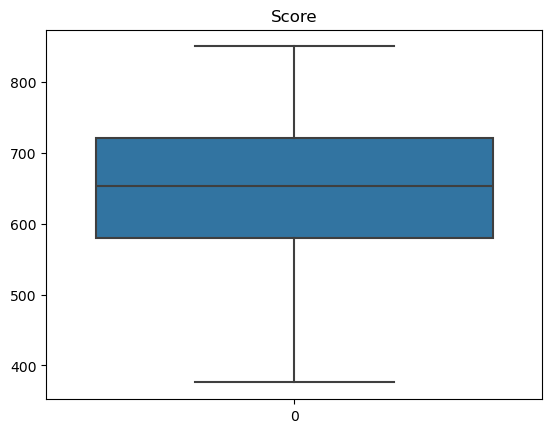

In [17]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


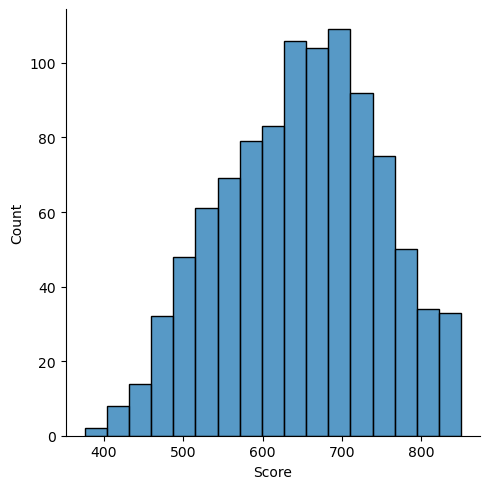

In [18]:
#erro apresentado:
#C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 
#Convert inf values to NaN before operating instead. with pd.option_context('mode.use_inf_as_na', True):
srn.displot(dataset['Score'])

In [19]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [20]:
# Identificando valores NAN
# Gênero e Salário possuem valores NAN
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [21]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [22]:
# descobre mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [23]:
# substitui valores NAN por mediana
# inplace = True faz com que a alteração seja feita direto no dataset, e não armazenar em uma nova variável
dataset['Salario'].fillna(mediana, inplace = True)

In [24]:
# verifica se substituiu mesmo
dataset['Salario'].isnull().sum()

0

In [25]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [26]:
dataset['Genero'].isnull().sum()

8

In [27]:
# preenche NA's com masculino, pois é a a moda
dataset['Genero'].fillna('Masculino', inplace = True)

In [28]:
dataset['Genero'].isnull().sum()

0

In [29]:
# padrozina de acordo com domínio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [44]:
# o valor min é -20, o que não faz sentido.
# o valor max é 140, e também não faz sentido.
dataset['Idade'].describe()

count    995.000000
mean      38.914573
std       10.692225
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [31]:
#visualizar registros que devem ser alterados
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [32]:
# calculando mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [33]:
# passando a mediana para valores que não fazem sentido
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

In [34]:
# conferindo valores
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [35]:
# buscando dados duplicados em ID
dataset[dataset.duplicated(['ID'], keep = False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [36]:
# excluíndo duplicados
dataset.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
# buscando duplicados novamente
dataset[dataset.duplicated(['ID'], keep = False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [37]:
# estados fora do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [38]:
# atribuímos a moda(RS) aos valores inválidos
dataset.loc[dataset['Estado'].isin (['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

In [39]:
# outliers em salário, vamos considerar 2 desvios padrão
# não existe uma regra universal para definir outliers. 
# nesse caso iremos considerar salários acima de 2x o desvio padrão
desv = sts.stdev(dataset['Salario'])
# verificando se existem valores que atendem o critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [40]:
#calcular mediana
mediana = sts.median(dataset['Salario'])
mediana

8641028.0

In [41]:
#atribundo o valor
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana
#conferindo alteração
dataset.loc[dataset['Salario'] >= 2 * desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [42]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [43]:
dataset.shape

(995, 12)